In [26]:
import numpy as np
import matplotlib.pyplot as plt

In [34]:
n = 5 #メッシュの数
dx = 1/(n-1) #メッシュの幅
k = 1 #熱伝導率
T = np.zeros([n,1])
T[0,0] = 0 #左端境界条件
T[n-1,0] = 1 #右端境界条件

In [35]:
A = np.zeros([n,n])
for i in range(0,n):
    A[i,i] = 2*k/dx #a_P, ai(TDMA)
    if i <= n-2:
        A[i+1,i] = -k/dx #-a_W, ci(TDMA)
        A[i,i+1] = -k/dx #-a_E, bi(TDMA)

# ディレクレ条件
A[0,0] = 1
A[0,1] = 0
A[n-1,n-1] = 1
A[n-1,n-2] = 0
#For debug
for i in range(0,n):
    print(A[i])

[1. 0. 0. 0. 0.]
[-4.  8. -4.  0.  0.]
[ 0. -4.  8. -4.  0.]
[ 0.  0. -4.  8. -4.]
[0. 0. 0. 0. 1.]


In [38]:
b = np.zeros([n,1]) #d(TDMA)
#ディレクレ条件
b[0,0] = T[0,0]
b[n-1,0] = T[n-1,0]
print(A)
print(b)

[[ 1.  0.  0.  0.  0.]
 [-4.  8. -4.  0.  0.]
 [ 0. -4.  8. -4.  0.]
 [ 0.  0. -4.  8. -4.]
 [ 0.  0.  0.  0.  1.]]
[[0.]
 [0.]
 [0.]
 [0.]
 [1.]]


In [48]:

#TDMA algorithm
P = np.zeros([1,n])
Q = np.zeros([1,n])

P[0,0] = -A[0,1]/A[0,0] #P1
Q[0,0] = b[0,0]/A[0,0] #Q1

for i in range(1,n-1):
    P[0,i] = -A[i,i+1]/(A[i,i]+A[i,i-1]*P[0,i-1])
    Q[0,i] = (b[i,0]-A[i,i-1]*Q[0,i-1])/(A[i,i]+A[i,i-1]*P[0,i-1])
P[0,n-1] = 0
Q[0,n-1] = T[n-1,0]

for i in range(1,n-1):
    T[n-1-i,0] = P[0,n-1-i]*T[n-i,0] + Q[0,n-1-i]
print(np.dot(A,T))


[[ 0.00000000e+00]
 [ 0.00000000e+00]
 [-2.22044605e-16]
 [-4.44089210e-16]
 [ 1.00000000e+00]]


'\n#TDMA solver\nimport numpy as np\ndef TDMAsolver(a, b, c, d):\n\n    nf = len(d) # number of equations\n    ac, bc, cc, dc = map(np.array, (a, b, c, d)) # copy arrays\n    for it in range(1, nf):\n        mc = ac[it-1]/bc[it-1]\n        bc[it] = bc[it] - mc*cc[it-1] \n        dc[it] = dc[it] - mc*dc[it-1]\n            \n    xc = bc\n    xc[-1] = dc[-1]/bc[-1]\n\n    for il in range(nf-2, -1, -1):\n        xc[il] = (dc[il]-cc[il]*xc[il+1])/bc[il]\n\n    return xc\n\n\na = np.zeros([n])\nb = np.zeros([n])\nc = np.zeros([n])\nd = np.zeros([n])\nfor i in range(0,n):\n    b[i] = A[i,i]\n    d[i] = b[i]\n    if i<= n-2:\n        print(i)\n        a[i] = A[i+1,i]\n        c[i] = A[i,i+1]\nT = TDMAsolver(a,b,c,d)\n'

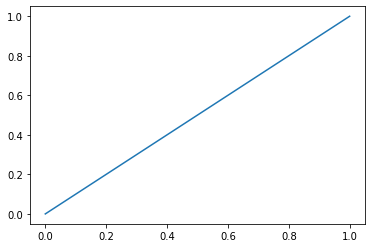

In [49]:
#plot
x = np.zeros([n,1])
for i in range(1,n):
    x[i,0] = dx+x[i-1,0]
plt.plot(x,T)